In [1]:
import pandas as pd
import os, re
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import os 
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

# sns.set_theme(style = "dark", 
#         color_codes = True,
#         font_scale = 1.5)

In [2]:
def load_images(path="image_jpg"):
    train_folder=os.path.join(os.getcwd(),'image_jpg',"train")
    test_folder=os.path.join(os.getcwd(),'image_jpg',"test")
    
    X_train, X_test, Y_train, Y_test = [],[],[],[]
    
    # loading images from train folder to X_train and label to y_train
    train_count = 0
    for image_fname in os.listdir(train_folder):
        image_re = re.match(r'([0-9]+)_([0-9]+)\.jpg',image_fname)
        
        # process preprocessed image into normalised flattened numpy array
        image = cv2.imread(os.path.join(train_folder,image_fname))
        grey = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        # assert grey.shape == (240,240)
        flat = grey.reshape(240*240)
        flat = flat.astype('float32')
        flat /= 255
        flat = np.asarray(flat).astype('float32')
        
        label = image_re.group(2)
        
        X_train.append(flat)
        Y_train.append(label)
        train_count+=1
        if train_count % 1000==0:
            print(train_count)
    print("Loaded train folder")
    
    # loading images from test folder to X_test and label to y_test
    test_count=0
    for image_fname in os.listdir(test_folder):
        image_re = re.match(r'([0-9]+)_([0-9]+)\.jpg',image_fname)
        
        # process preprocessed image into normalised flattened numpy array
        image = cv2.imread(os.path.join(test_folder,image_fname))
        grey = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        # assert grey.shape == (240,240)
        flat = grey.reshape(240*240)
        flat = flat.astype('float32')
        flat /= 255
        flat = np.asarray(flat).astype('float32')
        
        label = image_re.group(2)
        
        X_test.append(flat)
        Y_test.append(label)
        test_count+=1
        if test_count % 1000==0:
            print(test_count)
    print("Loaded test folder")
    return X_train, X_test, Y_train, Y_test

In [3]:
X_train, X_test, Y_train, Y_test = load_images()

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Loaded train folder
1000
Loaded test folder


In [4]:
X_train = np.array(X_train)
print(X_train)
print(np.shape(X_train))

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01568628 0.         ... 0.16470589 0.16470589 0.16862746]
 ...
 [0.19607843 0.19607843 0.19607843 ... 0.14901961 0.14509805 0.14117648]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(10618, 57600)


In [5]:
X_test = np.array(X_test)
print(X_test)
print(np.shape(X_test))

[[0.29411766 0.30588236 0.29411766 ... 0.28235295 0.23137255 0.22745098]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.19607843 0.19215687 0.21568628 ... 0.19607843 0.19607843 0.19607843]
 ...
 [0.14901961 0.14901961 0.14509805 ... 0.18431373 0.21960784 0.23529412]
 [0.14901961 0.14509805 0.14509805 ... 0.28235295 0.2901961  0.3372549 ]
 [0.2        0.2        0.19215687 ... 0.23529412 0.25882354 0.24313726]]
(1405, 57600)


In [6]:
Y_train = np.array(Y_train)
print(Y_train)
print(np.shape(Y_train))

['0' '2' '0' ... '0' '1' '1']
(10618,)


In [7]:
Y_test = np.array(Y_test)
print(Y_test)
print(np.shape(Y_test))

['1' '2' '1' ... '3' '3' '2']
(1405,)


In [8]:
from keras.utils import to_categorical

print("Shape before one-hot encoding : ",Y_train.shape)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("Shape after one-hot encoding : ",Y_train.shape)

2024-06-07 17:04:33.807868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 17:04:33.807926: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 17:04:33.809264: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-07 17:04:33.816563: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shape before one-hot encoding :  (10618,)
Shape after one-hot encoding :  (10618, 4)


In [9]:
Y_train

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [10]:
Y_test

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [11]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout


L1=200
L2=100
L3=50
model = Sequential()
model.add(Dense(L1,input_dim=57600,activation='relu'))
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))
# output layer (softmax = multinomial)
model.add(Dense(4,activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [13]:
history = model.fit(X_train,Y_train,epochs=10,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/10


2024-06-07 17:04:36.831019: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2446387200 exceeds 10% of free system memory.


332/332 [==============================] - 30s 89ms/step - loss: 2.6629 - accuracy: 0.3352 - val_loss: 1.3507 - val_accuracy: 0.4292
Epoch 2/10
332/332 [==============================] - 29s 87ms/step - loss: 1.3780 - accuracy: 0.3986 - val_loss: 1.2795 - val_accuracy: 0.4178
Epoch 3/10
332/332 [==============================] - 30s 89ms/step - loss: 1.2758 - accuracy: 0.4328 - val_loss: 1.2341 - val_accuracy: 0.4648
Epoch 4/10
332/332 [==============================] - 29s 89ms/step - loss: 1.2265 - accuracy: 0.4479 - val_loss: 1.0257 - val_accuracy: 0.5936
Epoch 5/10
332/332 [==============================] - 30s 90ms/step - loss: 1.1589 - accuracy: 0.4776 - val_loss: 1.0042 - val_accuracy: 0.5801
Epoch 6/10
332/332 [==============================] - 29s 88ms/step - loss: 1.1584 - accuracy: 0.4766 - val_loss: 0.9471 - val_accuracy: 0.6121
Epoch 7/10
332/332 [==============================] - 29s 88ms/step - loss: 1.1429 - accuracy: 0.4898 - val_loss: 0.9798 - val_accuracy: 0.6242
Epo

In [14]:
def plot_history(history):
    import matplotlib.pyplot as plt
 
    acc2 = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss2 = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1,len(acc2)+1)

    # Creating subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

    axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
    axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    axes[1].plot(epochs, loss2,'b',label='Train Loss')
    axes[1].plot(epochs, val_loss,'r',label='Test Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Display the figure
    plt.show()

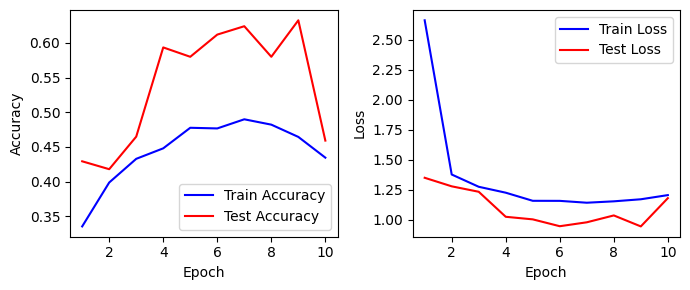

In [15]:
plot_history(history)

In [18]:
import numpy as np
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred,axis=1)
Y_test_arg = np.argmax(Y_test,axis=1)
Y_pred

44/44 [==============================] - 1s 12ms/step


array([0, 3, 0, ..., 0, 3, 0])

In [20]:
num_classes = 4
from sklearn.metrics import classification_report
target_dicts = {0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}
target_names = target_dicts.values()
print(classification_report(Y_test_arg,Y_pred,target_names=target_names))

              precision    recall  f1-score   support

      glioma       0.32      0.87      0.47       309
  meningioma       0.00      0.00      0.00       335
     notumor       0.86      0.72      0.79       399
   pituitary       0.39      0.24      0.30       362

    accuracy                           0.46      1405
   macro avg       0.39      0.46      0.39      1405
weighted avg       0.42      0.46      0.40      1405



In [21]:
# tuning

from keras.models import Sequential
from keras.layers import Dense

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        hp.Int("units", min_value=32, max_value=512, step=32),
        input_dim=57600,
        activation='relu'
    ))
    model.add(
        Dense(
            # Define the hyperparameter.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation=hp.Choice("activation", ["relu", "tanh"])
        )
    )
    model.add(
        Dense(
            # Define the hyperparameter.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation=hp.Choice("activation", ["relu", "tanh"])
        )
    )
    model.add(Dense(4,activation='softmax'))
    model.compile(
        optimizer="adam",
        loss="mean_squared_error",
        metrics=["accuracy"],
    )
    return model

In [22]:
import keras_tuner

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="dnn_tune",
    project_name="tune_dnn",
)

In [23]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}


In [24]:
tuner.search(X_train, Y_train, epochs=10,batch_size=16, validation_data=(X_test, Y_test))

Trial 10 Complete [00h 32m 27s]
val_accuracy: 0.28398576378822327

Best val_accuracy So Far: 0.28398576378822327
Total elapsed time: 03h 34m 36s
